In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [141]:
df_product = pd.read_csv('product.csv')
df_region = pd.read_csv('region.csv')
df_reseller = pd.read_csv('reseller.csv')
df_sales = pd.read_csv('sales.csv')
df_sales_person = pd.read_csv('sales_person.csv')
df_sales_person_region = pd.read_csv('sales_person_region.csv')
df_target = pd.read_csv('target.csv')

In [142]:
df_sales

,sales_key,sales_order_number,order_date,product_key,reseller_key,employee_key,sales_teritory_key,quantity,unit_price,sales,cost
0,1,SO43897,2017-08-25,235,312,282,4,2,$28.84,$57.68,$63.45
1,2,SO43897,2017-08-25,351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
2,3,SO43897,2017-08-25,348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
3,4,SO43897,2017-08-25,232,312,282,4,2,$28.84,$57.68,$63.45
4,5,SO44544,2017-11-18,292,312,282,4,2,$818.7,"$1,637.4","$1,413.62"
...,...,...,...,...,...,...,...,...,...,...,...
57846,57847,SO69476,2020-05-15,476,667,283,2,21,$38.49,$808.29,$549.7
57847,57848,SO69476,2020-05-15,474,667,283,2,19,$38.49,$731.31,$497.35
57848,57849,SO69493,2020-05-18,482,89,283,2,20,$4.94,$98.8,$67.25
57849,57850,SO69503,2020-05-20,482,79,282,3,23,$4.94,$113.62,$77.33


In [143]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sales_key           57851 non-null  int64 
 1   sales_order_number  57851 non-null  object
 2   order_date          57851 non-null  object
 3   product_key         57851 non-null  int64 
 4   reseller_key        57851 non-null  int64 
 5   employee_key        57851 non-null  int64 
 6   sales_teritory_key  57851 non-null  int64 
 7   quantity            57851 non-null  int64 
 8   unit_price          57851 non-null  object
 9   sales               57851 non-null  object
 10  cost                57851 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.9+ MB


In [144]:
df_sales.isna().sum()

,0
sales_key,0
sales_order_number,0
order_date,0
product_key,0
reseller_key,0
employee_key,0
sales_teritory_key,0
quantity,0
unit_price,0
sales,0


In [145]:
df_sales.duplicated().sum()

0

In [146]:
df_sales.describe()

,sales_key,product_key,reseller_key,employee_key,sales_teritory_key,quantity
count,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000
mean,28926.000000,408.636705,340.742978,286.131735,4.554424,3.528271
std,16700.289548,113.665645,205.493906,4.521832,2.412247,3.035766
min,1.000000,212.000000,1.000000,272.000000,1.000000,1.000000
25%,14463.500000,326.000000,166.000000,283.000000,3.000000,2.000000
50%,28926.000000,401.000000,327.000000,285.000000,4.000000,3.000000
75%,43388.500000,491.000000,514.000000,290.000000,6.000000,4.000000
max,57851.000000,606.000000,701.000000,296.000000,10.000000,44.000000


In [147]:
# Clean the 'sales' column by removing $ and , symbols, then convert it to a float type
df_sales['sales'] = df_sales['sales'].replace('[\$,]', '', regex=True).astype(float)

# Clean the 'cost' column by removing $ and , symbols, then convert it to a float type
df_sales['cost'] = df_sales['cost'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the 'profit' column by subtracting 'cost' from 'sales' for each row
df_sales['profit'] = df_sales['sales'] - df_sales['cost']

In [148]:
df_sales

,sales_key,sales_order_number,order_date,product_key,reseller_key,employee_key,sales_teritory_key,quantity,unit_price,sales,cost,profit
0,1,SO43897,2017-08-25,235,312,282,4,2,$28.84,57.68,63.45,-5.77
1,2,SO43897,2017-08-25,351,312,282,4,2,"$2,024.99",4049.98,3796.19,253.79
2,3,SO43897,2017-08-25,348,312,282,4,2,"$2,024.99",4049.98,3796.19,253.79
3,4,SO43897,2017-08-25,232,312,282,4,2,$28.84,57.68,63.45,-5.77
4,5,SO44544,2017-11-18,292,312,282,4,2,$818.7,1637.40,1413.62,223.78
...,...,...,...,...,...,...,...,...,...,...,...,...
57846,57847,SO69476,2020-05-15,476,667,283,2,21,$38.49,808.29,549.70,258.59
57847,57848,SO69476,2020-05-15,474,667,283,2,19,$38.49,731.31,497.35,233.96
57848,57849,SO69493,2020-05-18,482,89,283,2,20,$4.94,98.80,67.25,31.55
57849,57850,SO69503,2020-05-20,482,79,282,3,23,$4.94,113.62,77.33,36.29


In [149]:
df_sales['profit'].max()

1278.3600000000006

In [150]:
df_sales['profit'].min()

-11597.79

In [151]:
# Convert the 'order_date' column to datetime format to ensure proper date processing.
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')

# Add a new column 'order_month' by extracting the month and year from 'order_date' in Period format (YYYY-MM).
df_sales['order_month'] = df_sales['order_date'].dt.to_period('M')

# Group the data by 'order_month' and calculate the total profit for each month.
monthly_profit = df_sales.groupby('order_month')['profit'].sum().reset_index()

# Convert the 'order_month' column from Period format to string for easier visualization or export.
monthly_profit['order_month'] = monthly_profit['order_month'].astype(str)

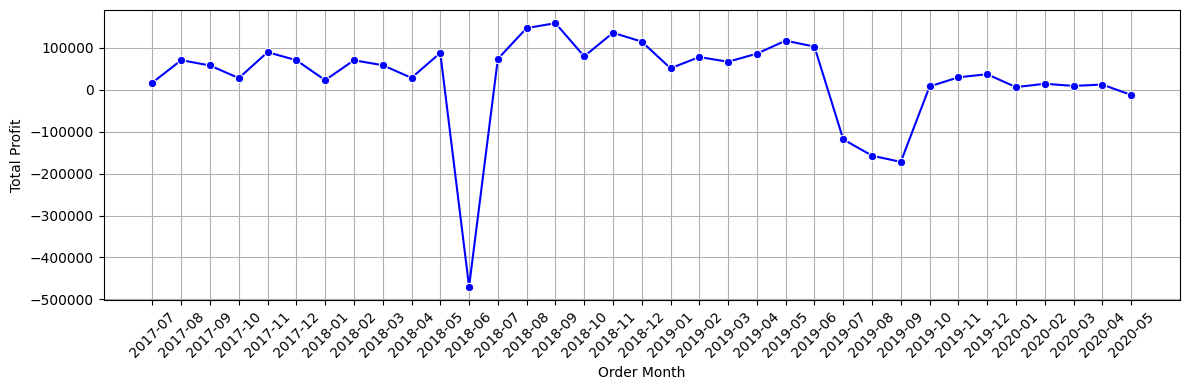

In [152]:
# Set the figure size for the plot to ensure it has an appropriate aspect ratio.
plt.figure(figsize=(12, 4))

# Create a line plot with 'order_month' on the x-axis and 'profit' on the y-axis, adding markers for data points.
sns.lineplot(x='order_month', y='profit', data=monthly_profit, marker='o', color='blue')

# Label the x-axis as "Order Month."
plt.xlabel("Order Month")

# Label the y-axis as "Total Profit."
plt.ylabel("Total Profit")

# Add gridlines to make the chart easier to read.
plt.grid(True)

# Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping or cutoff elements.
plt.tight_layout()

# Display the plot.
plt.show()

In [153]:
# Group the sales data by 'order_month' and calculate the total sales for each month.
monthly_sales = df_sales.groupby('order_month')['sales'].sum().reset_index()

# Convert the 'order_month' column from Period format to string for easier visualization or export.
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

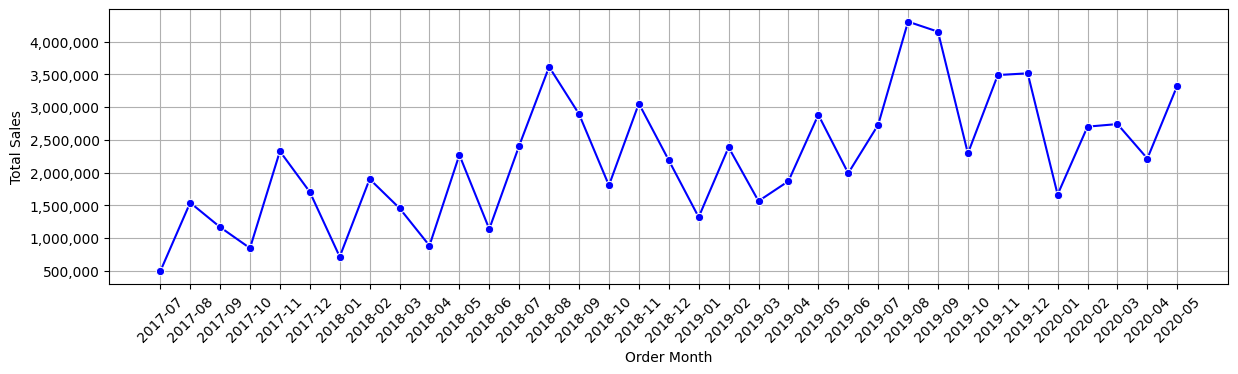

In [154]:
# Set the figure size to ensure the plot has a proper aspect ratio.
plt.figure(figsize=(12, 4))

# Create a line plot with 'order_month' on the x-axis and 'sales' on the y-axis, adding markers for data points.
sns.lineplot(x='order_month', y='sales', data=monthly_sales, marker='o', color='blue')

# Label the x-axis as "Order Month."
plt.xlabel("Order Month")

# Label the y-axis as "Total Sales."
plt.ylabel("Total Sales")

# Add gridlines to make the chart easier to read.
plt.grid(True)

# Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping or cutoff elements.
plt.tight_layout()

# Set the Y-axis to display full numbers with commas as thousand separators.
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatter to the Y-axis

# Display the plot.
plt.show()

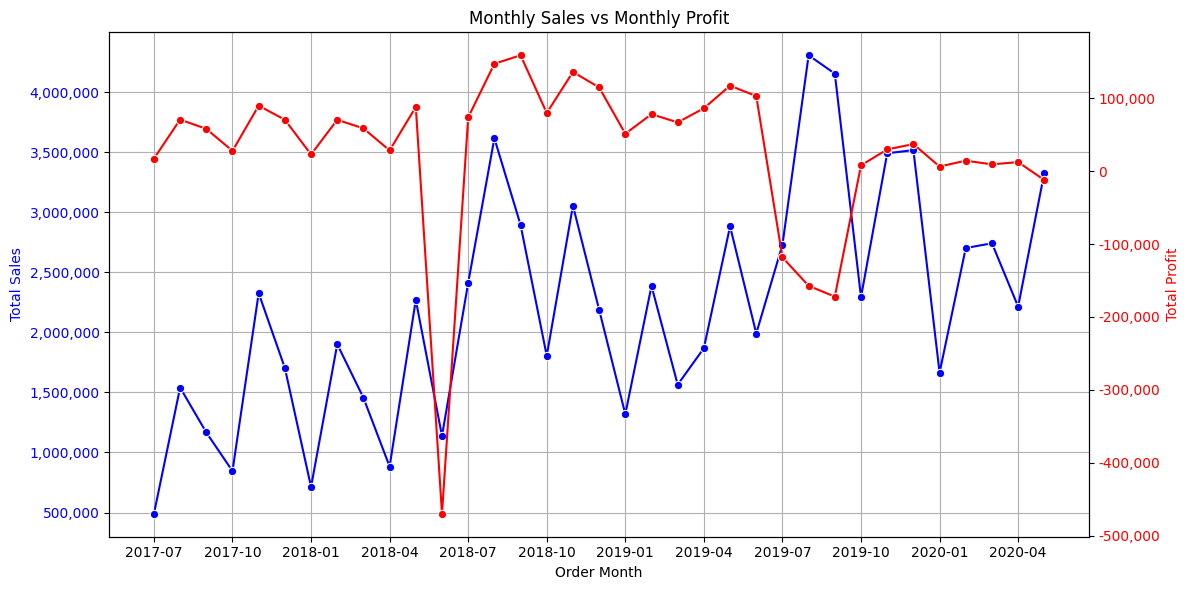

In [155]:
# Merging monthly_sales and monthly_profit datasets on 'order_month'
combined_data = pd.merge(monthly_sales, monthly_profit, on='order_month')

# Creating a plot with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Sales on the first Y-axis
ax1.set_xlabel("Order Month")  # Label for the X-axis
ax1.set_ylabel("Total Sales", color="blue")  # Label for the first Y-axis
sns.lineplot(x='order_month', y='sales', data=combined_data, marker='o', color='blue', ax=ax1)  # Line plot for sales
ax1.tick_params(axis='y', labelcolor="blue")  # Setting tick colors for the first Y-axis

# Formatting the Y-axis to include commas in numbers
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adding grid lines for better readability
ax1.grid(True)

# Adding a second Y-axis for Total Profit
ax2 = ax1.twinx()  # Creating a twin Y-axis
ax2.set_ylabel("Total Profit", color="red")  # Label for the second Y-axis
sns.lineplot(x='order_month', y='profit', data=combined_data, marker='o', color='red', ax=ax2)  # Line plot for profit
ax2.tick_params(axis='y', labelcolor="red")  # Setting tick colors for the second Y-axis

# Formatting the second Y-axis to include commas in numbers
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjusting the X-axis to display every 3rd month label for clarity
plt.xticks(
    ticks=range(0, len(combined_data['order_month']), 3),  # Show every 3 months
    labels=combined_data['order_month'][::3],  # Select labels for every 3rd month
    rotation=45,  # Rotate labels for better readability
    fontsize=10   # Set smaller font size for the labels
)

# Adding a title to the plot
plt.title("Monthly Sales vs Monthly Profit")

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()

In [156]:
# Merging the sales dataset (df_sales) with the product dataset (df_product)
# The datasets are merged on the 'product_key' column, which acts as the common identifier between the two datasets.
df_sales_and_product = pd.merge(df_sales, df_product, on='product_key')

# Displaying the first few rows of the merged dataset to verify the merge and inspect the structure of the resulting dataframe.
df_sales_and_product.head()

,sales_key,sales_order_number,order_date,product_key,reseller_key,employee_key,sales_teritory_key,quantity,unit_price,sales,cost,profit,order_month,name,standard_cost,color,subcategory,category,background_color_format,font_color_format
0,1,SO43897,2017-08-25,235,312,282,4,2,$28.84,57.68,63.45,-5.77,2017-08,"Long-Sleeve Logo Jersey, XL",$31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
1,2,SO43897,2017-08-25,351,312,282,4,2,"$2,024.99",4049.98,3796.19,253.79,2017-08,"Mountain-100 Black, 48","$1,898.09",Black,Mountain Bikes,Bikes,#000000,#FFFFFF
2,3,SO43897,2017-08-25,348,312,282,4,2,"$2,024.99",4049.98,3796.19,253.79,2017-08,"Mountain-100 Black, 38","$1,898.09",Black,Mountain Bikes,Bikes,#000000,#FFFFFF
3,4,SO43897,2017-08-25,232,312,282,4,2,$28.84,57.68,63.45,-5.77,2017-08,"Long-Sleeve Logo Jersey, L",$31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
4,5,SO44544,2017-11-18,292,312,282,4,2,$818.7,1637.40,1413.62,223.78,2017-11,"HL Mountain Frame - Silver, 48",$706.81,Silver,Mountain Frames,Components,#C0C0C0,#000000


In [157]:
# Filtering the merged dataset (df_sales_and_product) to include only sales within a specific date range
# This filters rows where 'order_date' is between January 1, 2020, and May 31, 2020
filtered_data = df_sales_and_product[
    (df_sales_and_product['order_date'] >= '2020-01-01') &  # Include dates from January 1, 2020
    (df_sales_and_product['order_date'] <= '2020-05-31')    # Include dates up to May 31, 2020
]

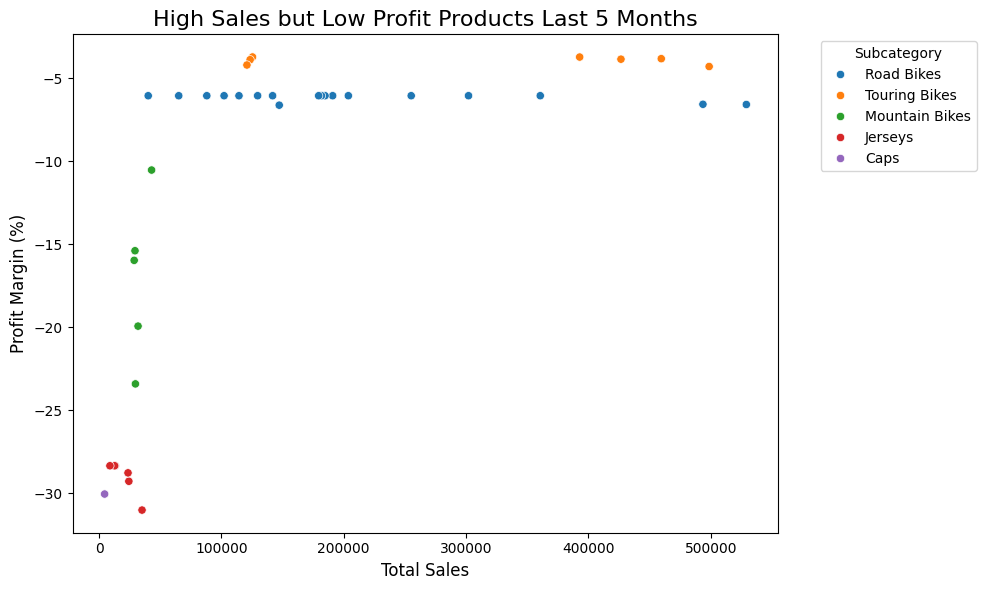

In [158]:
# Grouping the filtered data by 'product_key' and 'subcategory'
# Aggregating total sales and total cost for each product and subcategory
product_performance = filtered_data.groupby(['product_key', 'subcategory']).agg(
    total_sales=('sales', 'sum'),  # Summing up sales for each product
    total_cost=('cost', 'sum')    # Summing up costs for each product
).reset_index()

# Calculating total profit and profit margin for each product
product_performance['total_profit'] = product_performance['total_sales'] - product_performance['total_cost']  # Profit calculation
product_performance['profit_margin'] = (product_performance['total_profit'] / product_performance['total_sales']) * 100  # Profit margin as a percentage

# Filtering products with high total sales but low profit margin
# Low profit margin is defined as being below the 25th percentile of all profit margins
high_sales_low_profit = product_performance[
    (product_performance['profit_margin'] < product_performance['profit_margin'].quantile(0.25))  # Profit margin below 25th percentile
].sort_values(by='total_sales', ascending=False)  # Sorting by total sales in descending order

# Setting the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Creating a scatter plot to visualize products with high sales but low profit margins
sns.scatterplot(
    data=high_sales_low_profit,  # Data to be plotted
    x='total_sales',            # Total sales on the x-axis
    y='profit_margin',          # Profit margin on the y-axis
    hue='subcategory',          # Color by subcategory
    palette='tab10'             # Color palette for subcategories
)

# Adding a title and axis labels
plt.title('High Sales but Low Profit Products Last 5 Months', fontsize=16)  # Plot title
plt.xlabel('Total Sales', fontsize=12)  # Label for the x-axis
plt.ylabel('Profit Margin (%)', fontsize=12)  # Label for the y-axis

# Adjusting the legend to appear outside the plot for better readability
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensuring a tight layout to prevent overlap
plt.tight_layout()

# Displaying the plot
plt.show()

In [159]:
# Merging sales data (df_sales) with region data (df_region)
# The merge is performed using 'sales_teritory_key' as the common column
merged_sales_region = pd.merge(df_sales, df_region, on='sales_teritory_key', how='left')

# Merging the result from the previous step (merged_sales_region) with product data (df_product)
# The merge is performed using 'product_key' as the common column
final_merged_df = pd.merge(merged_sales_region, df_product, on='product_key', how='left')

In [160]:
# Filtering the final merged dataset (final_merged_df) for sales data within a specific date range
# This selects records with 'order_date' between January 1, 2020, and May 31, 2020
filtered_sales_data_per_region = final_merged_df[
    (final_merged_df['order_date'] >= '2020-01-01') &  # Include dates from January 1, 2020
    (final_merged_df['order_date'] <= '2020-05-31')    # Include dates up to May 31, 2020
]

# Calculating total sales, total cost, and profit per region
# Grouping the filtered data by 'group' (region) to aggregate metrics
region_performance = filtered_sales_data_per_region.groupby('group').agg(
    total_sales=('sales', 'sum'),  # Total sales for each region
    total_cost=('cost', 'sum')    # Total cost for each region
).reset_index()

# Adding a 'total_profit' column
# Profit is calculated as the difference between total sales and total cost for each region
region_performance['total_profit'] = region_performance['total_sales'] - region_performance['total_cost']

# Filtering regions with negative profit
# These are regions where the total cost exceeds the total sales, leading to a loss
low_profit_regions = region_performance[region_performance['total_profit'] < 0]

<ipython-input-161-3e50213d619d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


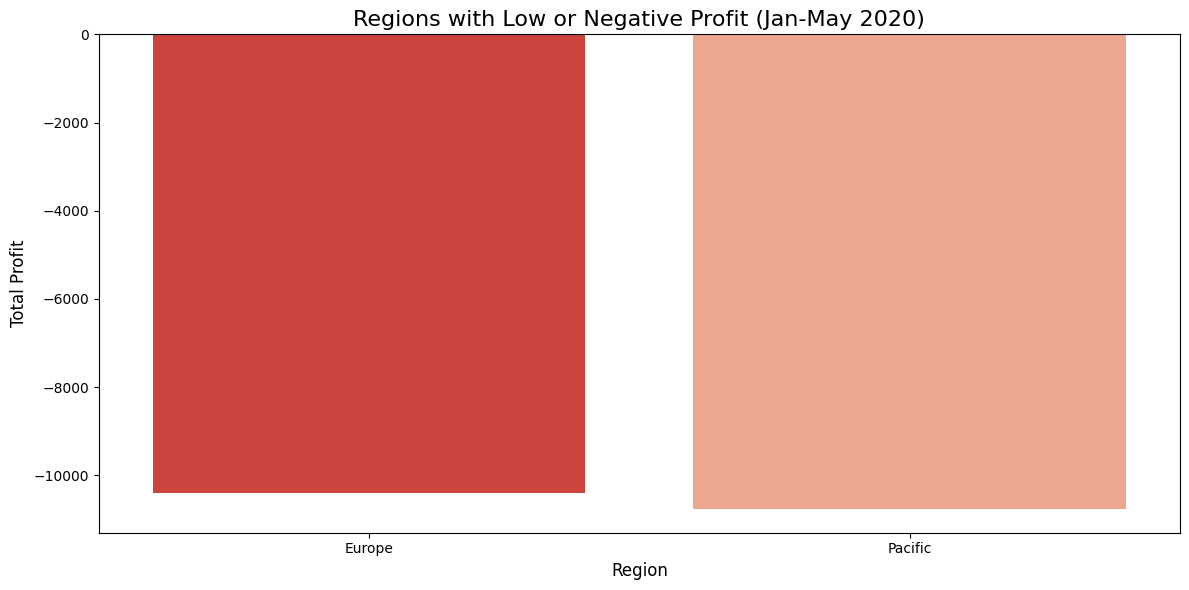

In [161]:
# Setting the figure size for the plot
# This ensures the plot has adequate dimensions for clear visualization
plt.figure(figsize=(12, 6))

# Creating a bar plot for regions with low or negative profit
# Using 'group' as the x-axis (regions) and 'total_profit' as the y-axis
# The palette 'Reds_r' is used to highlight negative or low profits with varying shades of red
sns.barplot(
    data=low_profit_regions,  # Data containing regions with negative profit
    x='group',               # Regions (x-axis)
    y='total_profit',        # Total profit (y-axis)
    palette='Reds_r'         # Red color palette for highlighting losses
)

# Adding a title and axis labels for the plot
plt.title('Regions with Low or Negative Profit (Jan-May 2020)', fontsize=16)  # Plot title
plt.xlabel('Region', fontsize=12)  # Label for the x-axis
plt.ylabel('Total Profit', fontsize=12)  # Label for the y-axis

# Adjusting the layout to prevent overlap and ensure proper spacing
plt.tight_layout()

# Displaying the plot
plt.show()

In [162]:
# Filter sales data for the last 5 months (1 January 2020 - 31 May 2020)
# This filters rows where 'order_date' falls between the specified date range
filtered_sales_df = df_sales[
    (df_sales['order_date'] >= '2020-01-01') &  # Start date filter
    (df_sales['order_date'] <= '2020-05-31')   # End date filter
]

# Merge the filtered sales data with region and product data
# First, merge with the region dataset on 'sales_teritory_key' to include region information
merged_data_sales = filtered_sales_df.merge(df_region, on='sales_teritory_key', how='left')
# Then, merge with the product dataset on 'product_key' to include product details
merged_data_sales = merged_data_sales.merge(df_product, on='product_key', how='left')

# Filter data for the regions of interest (Europe and Pacific)
# This selects only rows where the 'group' column matches one of the specified regions
regions_of_interest = ['Europe', 'Pacific']
region_specific_data = merged_data_sales[merged_data_sales['group'].isin(regions_of_interest)]

# Filter data for low margin subcategories (Road Bikes and Touring Bikes)
# This narrows down the data to specific subcategories of interest
low_margin_subcategories = ['Road Bikes', 'Touring Bikes']
low_margin_data = region_specific_data[region_specific_data['subcategory'].isin(low_margin_subcategories)]

# Calculate the total number of products sold per region for these low margin subcategories
# Grouping by region ('group') and subcategory ('subcategory') and counting the number of products
region_sales_analysis = low_margin_data.groupby(['group', 'subcategory']).agg(
    total_sales_count=('product_key', 'count')  # Count the number of product keys (sales count)
).reset_index()

# Calculate the total sales count for each region
# Grouping by region ('group') to count the total number of products sold
total_region_sales = region_specific_data.groupby('group').agg(
    total_sales_count=('product_key', 'count')  # Count the total number of product keys per region
).reset_index()

# Merge the analysis data with total sales data for percentage calculation
# Joining the low margin sales data with total sales data per region
region_sales_analysis = region_sales_analysis.merge(total_region_sales, on='group', how='left')

# Calculate the percentage of low margin products sold in each region
# The percentage is calculated as the ratio of low margin sales to total sales in the region
region_sales_analysis['percentage'] = (
    region_sales_analysis['total_sales_count_x'] / region_sales_analysis['total_sales_count_y']
) * 100

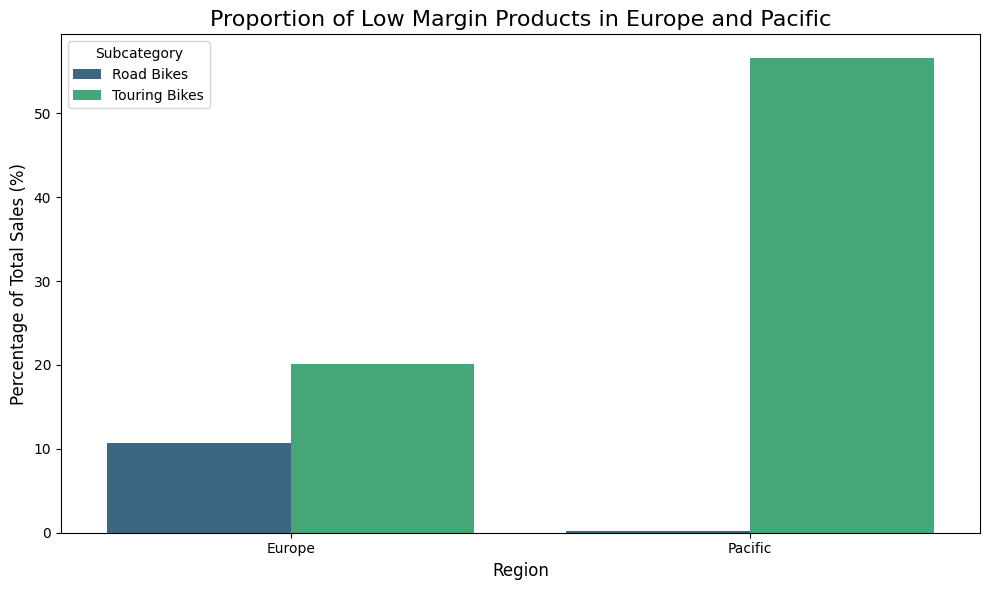

In [163]:
# Create a bar plot with legend (hue) in the top left corner
plt.figure(figsize=(10, 6))
sns.barplot(
    data=region_sales_analysis,
    x='group',
    y='percentage',
    hue='subcategory',
    palette='viridis'
)

# Add titles and labels
plt.title('Proportion of Low Margin Products in Europe and Pacific', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Total Sales (%)', fontsize=12)
plt.legend(title='Subcategory', loc='upper left', bbox_to_anchor=(0, 1))

# Display the plot
plt.tight_layout()
plt.show()

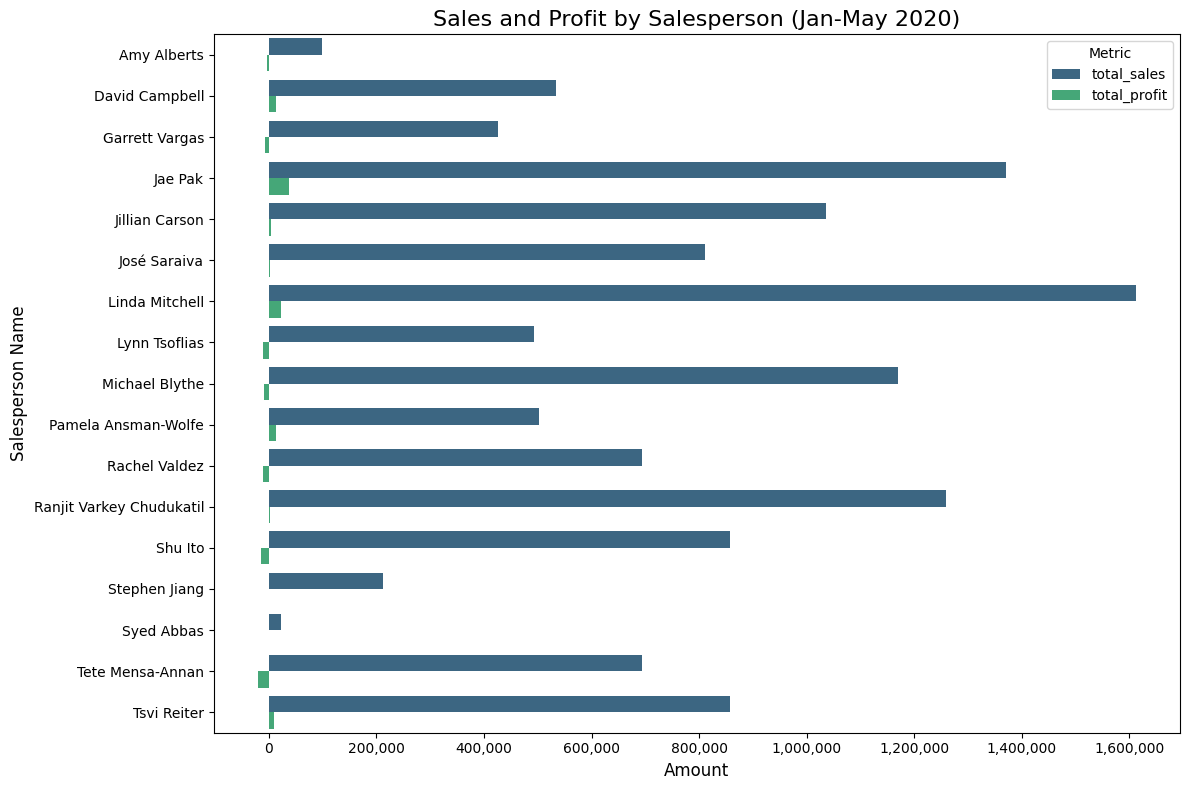

In [164]:
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')
filtered_sales_df = df_sales[(df_sales['order_date'] >= '2020-01-01') & (df_sales['order_date'] <= '2020-05-31')]

# Merge datasets
merged_data_salesperson = filtered_sales_df.merge(df_product, on='product_key', how='left')
merged_data_salesperson = merged_data_salesperson.merge(df_sales_person, on='employee_key', how='left')

# Calculate total sales and profit for each salesperson
salesperson_analysis = merged_data_salesperson.groupby('name_y').agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Reshape data for plotting
salesperson_analysis_melted = salesperson_analysis.melt(
    id_vars='name_y',
    value_vars=['total_sales', 'total_profit'],
    var_name='Metric',
    value_name='Amount'
)

from matplotlib.ticker import StrMethodFormatter

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=salesperson_analysis_melted, x='Amount', y='name_y', hue='Metric', palette='viridis')
plt.title('Sales and Profit by Salesperson (Jan-May 2020)', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Salesperson Name', fontsize=12)

# Format x-axis to show full numbers without abbreviation
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()